<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [4]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [5]:
# type your code here
df_malayria=pd.read_csv('malaria.csv')
df_malayria.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
na_data=df_malayria.isnull()
df=na_data.all(axis='columns')==True
df.index[df==True].tolist()





[4, 21, 39, 99]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here
threshold_value=0.6*df_malayria.shape[0]
null_values=df_malayria.isnull().sum()
print(null_values)

col_list=list(null_values.index[null_values>threshold_value])


print(col_list)



Cases_Guinea            34
Cases_Liberia           44
Cases_SierraLeone       40
Cases_Nigeria           89
Cases_Senegal          102
Cases_UnitedStates      54
Cases_Spain            111
Cases_Mali             115
Deaths_Guinea           35
Deaths_Liberia          46
Deaths_SierraLeone      40
Deaths_Nigeria          89
Deaths_Senegal         105
Deaths_UnitedStates     70
Deaths_Spain           111
Deaths_Mali            115
dtype: int64
['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali', 'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here
nigeria=df_malayria[['Cases_Nigeria','Deaths_Nigeria']]
senegal=df_malayria[['Cases_Senegal','Deaths_Senegal']]
spain=df_malayria[['Cases_Spain','Deaths_Spain']]
mali=df_malayria[['Cases_Mali','Deaths_Mali']]

print('Nigeria:',nigeria.isnull().sum().sum())
print('Senegal:',senegal.isnull().sum().sum())
print('Spain:',spain.isnull().sum().sum())
print('Mali:',mali.isnull().sum().sum())




Nigeria: 178
Senegal: 207
Spain: 222
Mali: 230


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

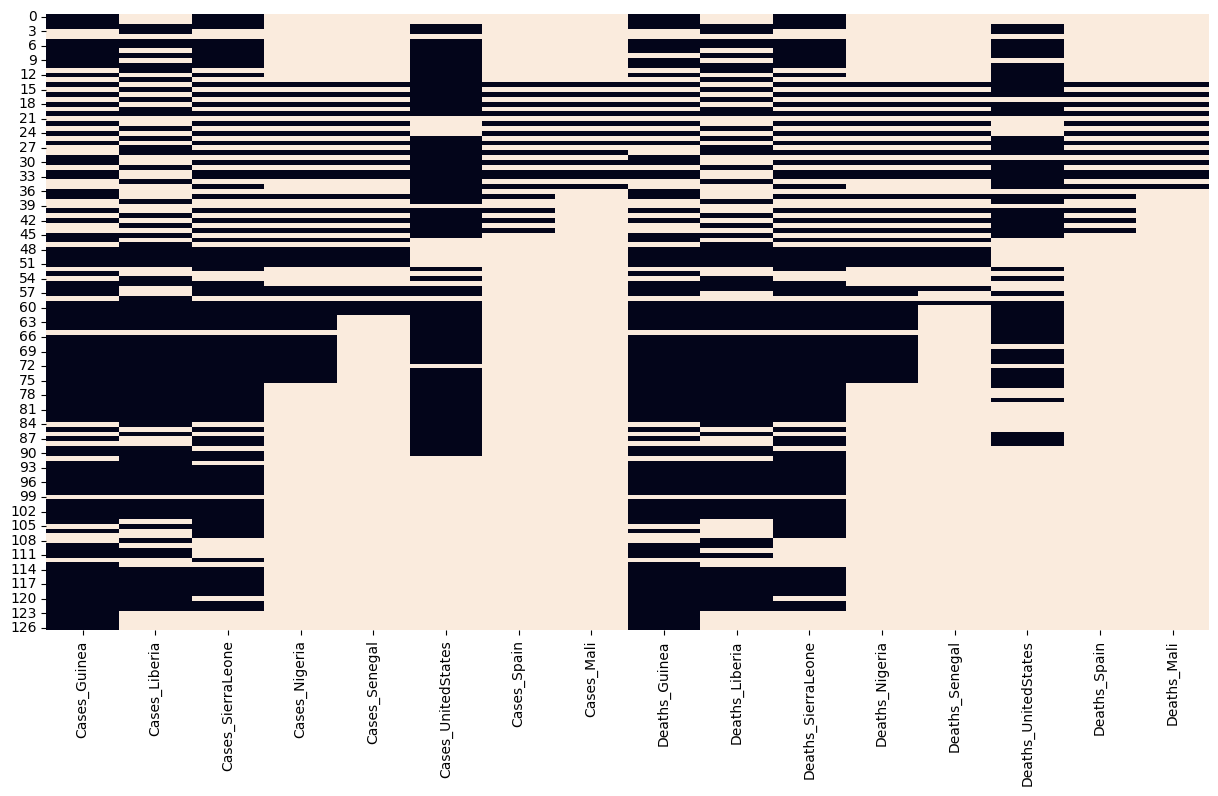

In [30]:
# type your code here
plt.figure(figsize=(15,8))
sns.heatmap(df_malayria.isnull(),cbar=False)
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# type your code here
row_count=df_malayria.count(axis=1)
df_malayria[row_count>2]


,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,83.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
119,122.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,80.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
120,112.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
121,112.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,70.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# type your code here
col_list
df_malayria.drop(col_list,axis=1,inplace=True)


KeyError: "['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali', 'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'] not found in axis"

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# type your code here
df_malayria
empty_values=df_malayria['Cases_Liberia'].isnull().sum()
empty_values

df_malayria['Cases_Liberia']=df_malayria['Cases_Liberia'].fillna(df_malayria['Cases_Liberia'].median())

empty_values=df_malayria['Cases_Liberia'].isnull().sum()
empty_values

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# type your code here
df_malayria
empty_values=df_malayria['Cases_UnitedStates'].isnull().sum()
empty_values

df_malayria['Cases_UnitedStates']=df_malayria['Cases_UnitedStates'].fillna(df_malayria['Cases_UnitedStates'].median())
empty_values=df_malayria['Cases_UnitedStates'].isnull().sum()
empty_values

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# type your code here
df_observations=df_malayria[['Cases_Guinea','Deaths_Guinea']]
df_observations.isnull().sum()
for i in df_observations:
    df_malayria[i]=df_malayria[i].fillna(df_malayria[i].median())

print(df_observations.isnull().sum())


Cases_Guinea     0
Deaths_Guinea    0
dtype: int64


## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here
df_house=pd.read_csv('house.csv')
df_house.head()


,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


In [7]:
cols=df_house.select_dtypes(include=np.number)
from pylab import rcParams

rcParams['figure.figsize']=10,5





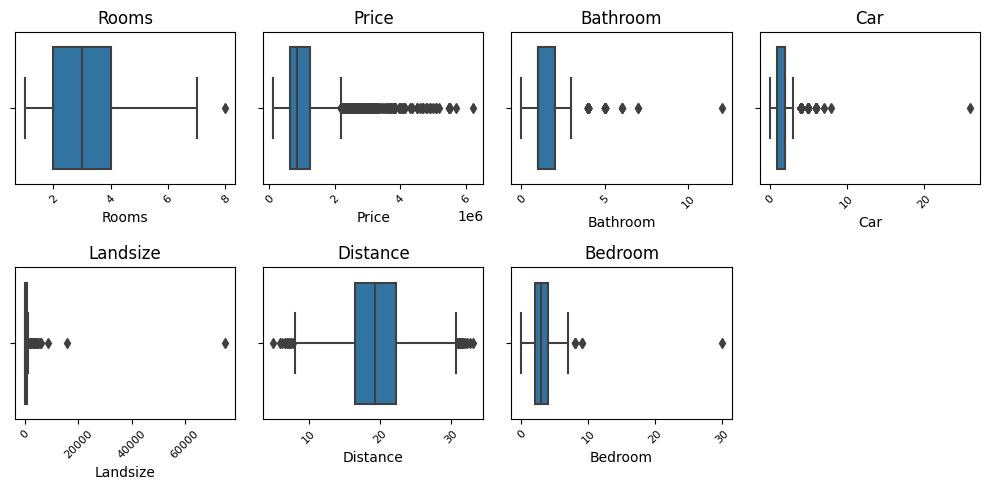

In [10]:
j=1
for i in cols:
    plt.subplot(2,4,j)
    sns.boxplot(x=df_house.loc[:,i])
    plt.title(i)
    j=j+1
    plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()




<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

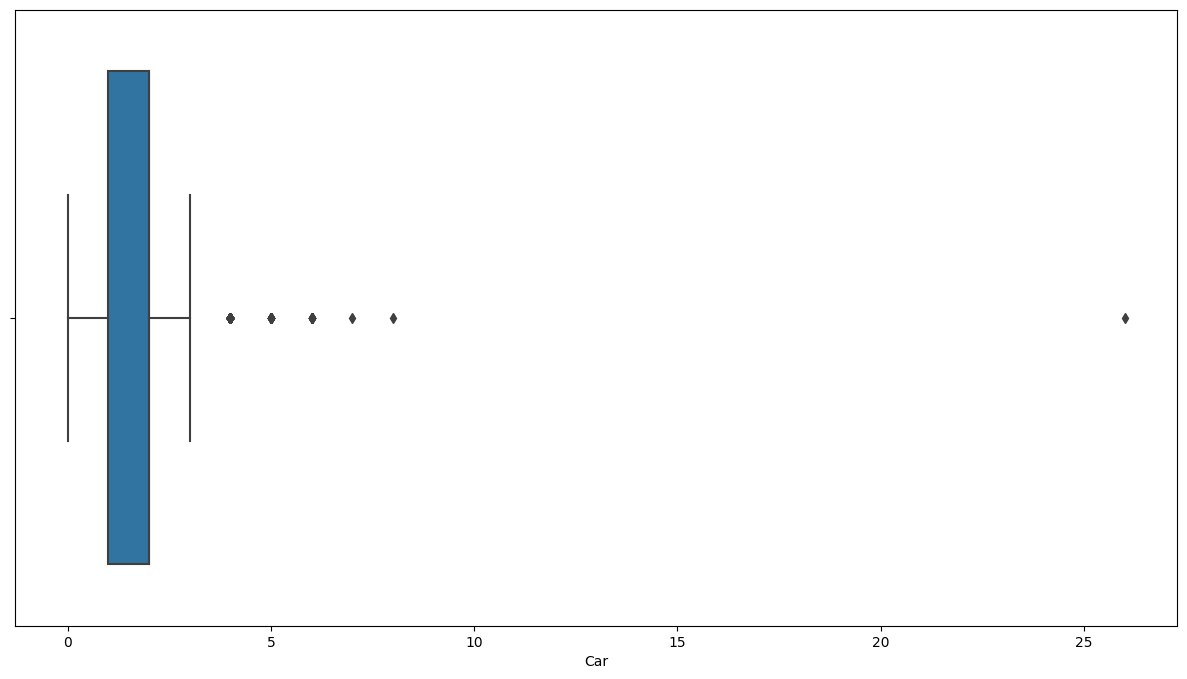

In [12]:
# type your code here
plt.figure(figsize=(15,8))
sns.boxplot(x=df_house['Car'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

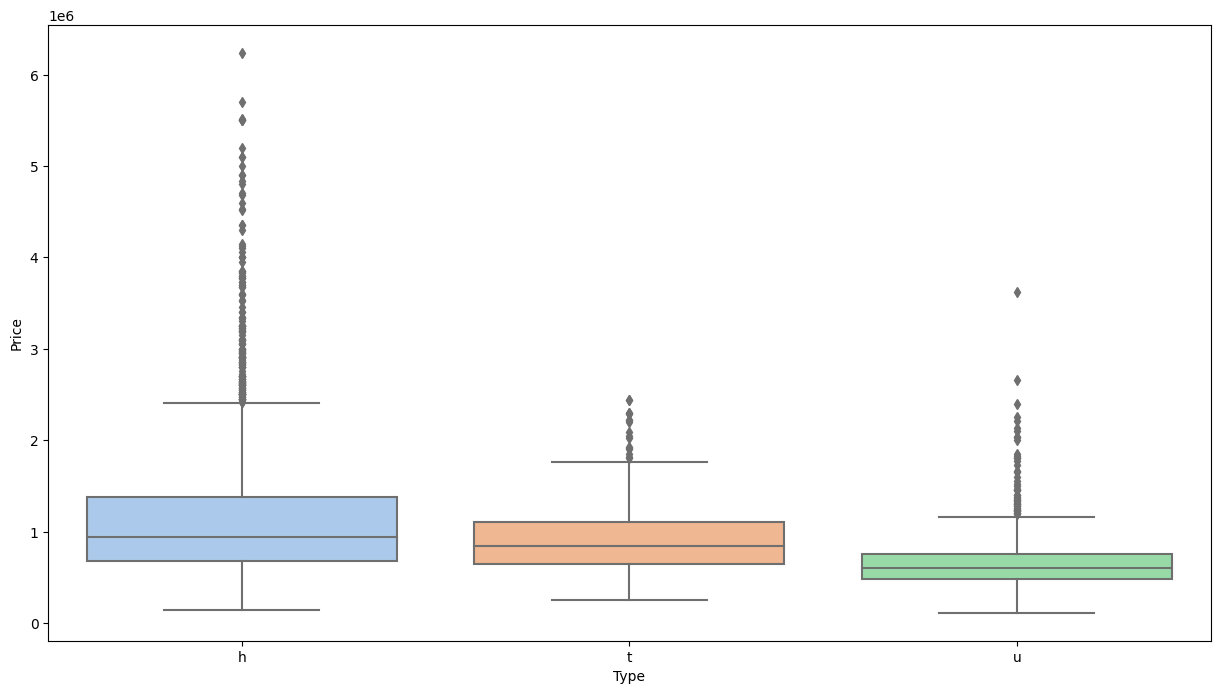

In [13]:
# type your code here
plt.figure(figsize=(15,8))
sns.boxplot(x=df_house['Type'],y=df_house['Price'],palette='pastel')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
q1=df_house['Rooms'].quantile(0.25)
q3=df_house['Rooms'].quantile(0.75)
iqr=q3-q1
df_house[(df_house['Rooms']<q1-1.5*iqr)|(df_house['Rooms']>q3+1.5*iqr)]


,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
3073,8,u,2250000,PI,Northern Metropolitan,3,2,543,25.3,2


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

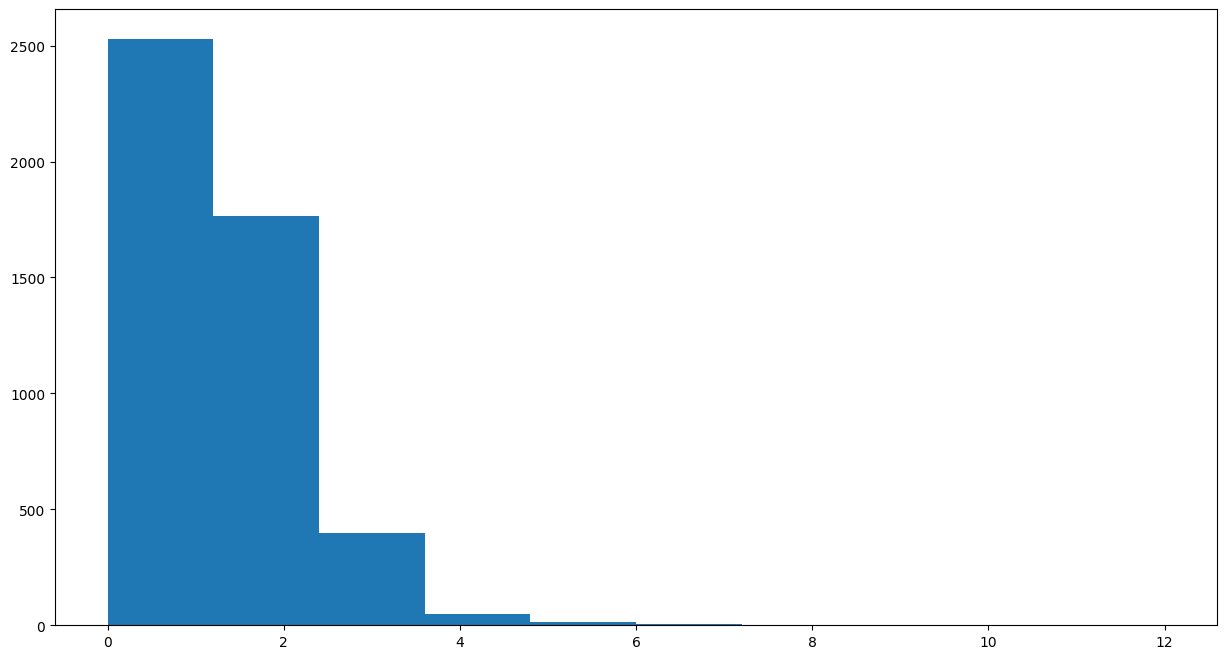

In [16]:
# type your code here
plt.figure(figsize=(15,8))
plt.hist(x=df_house['Bathroom'])
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

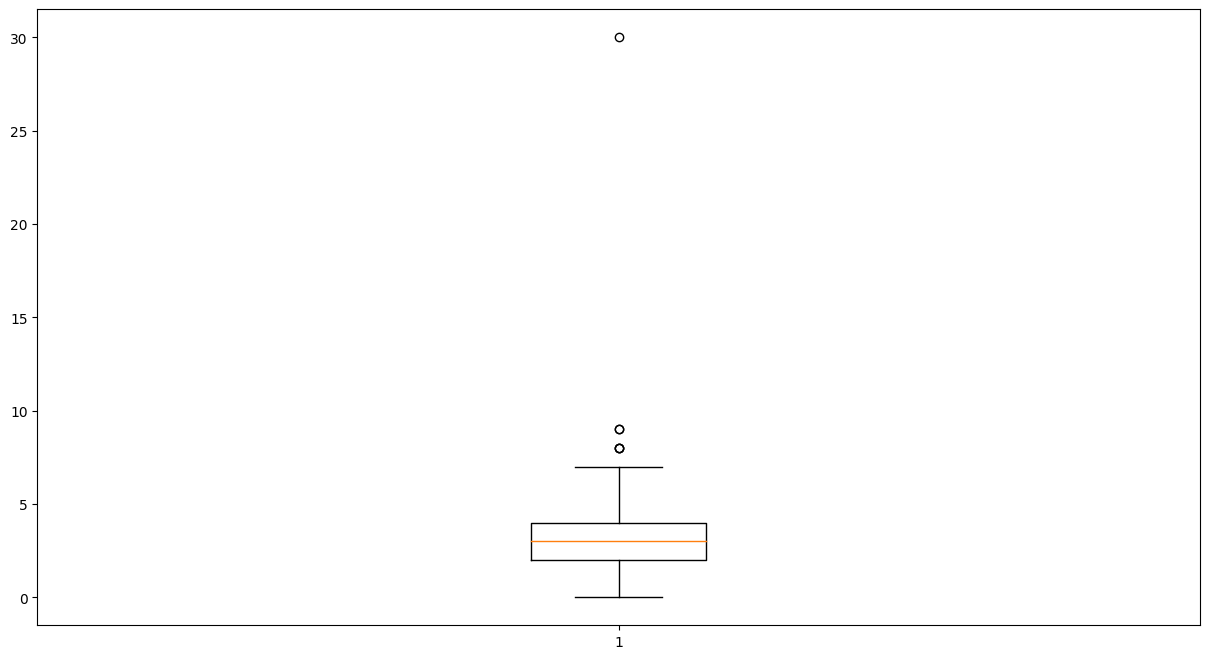

In [17]:
# type your code here
plt.figure(figsize=(15,8))
plt.boxplot(x=df_house['Bedroom'])
plt.show()

In [18]:
q1=df_house['Bedroom'].quantile(0.25)
q3=df_house['Bedroom'].quantile(0.75)
iqr=q3-q1
df_house[df_house['Bedroom']>q3+1.5*iqr]

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
279,3,t,1100000,S,Southern Metropolitan,1,1,0,12.1,8
467,2,u,612000,S,South-Eastern Metropolitan,1,2,766,27.1,9
1228,3,h,470000,PI,Western Metropolitan,2,2,486,20.9,9
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30
4241,3,h,825000,S,Eastern Metropolitan,2,2,296,21.2,8
4249,3,t,750000,S,Western Metropolitan,2,0,311,22.1,8


<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Average Distance Before: 19.328346621905162
Average Distance After: 19.31142555438226


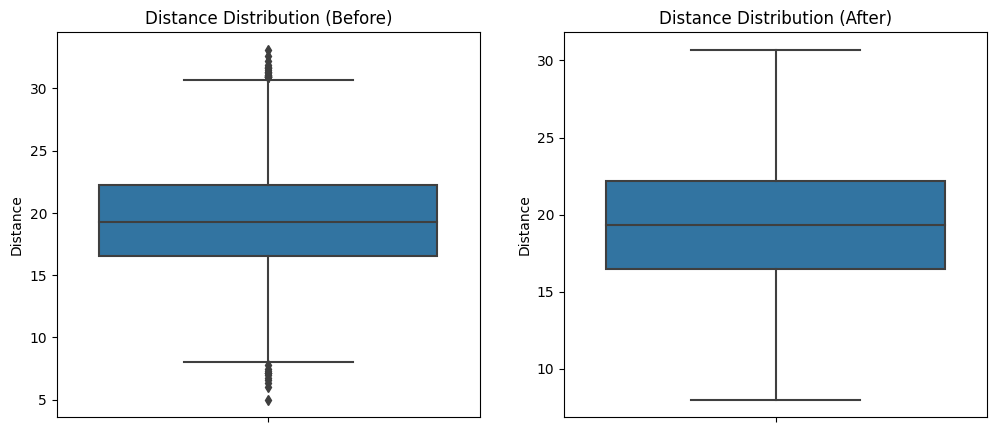

In [23]:
# type your code here
import matplotlib.pyplot as plt
import seaborn as sns

avg_distance_before = df_house['Distance'].mean()
print('Average Distance Before:', avg_distance_before)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_house['Distance'])
plt.title('Distance Distribution (Before)')

q1 = df_house['Distance'].quantile(0.25)
q3 = df_house['Distance'].quantile(0.75)
iqr = q3 - q1
val = df_house[(df_house['Distance'] >= q1 - 1.5 * iqr) & (df_house['Distance'] <= q3 + 1.5 * iqr)]  # Updated this line
avg_distance_after = val['Distance'].mean()  # Calculate the average distance after handling outliers
print('Average Distance After:', avg_distance_after)

plt.subplot(1, 2, 2)
sns.boxplot(y=val['Distance'])
plt.title('Distance Distribution (After)')

plt.show()




<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

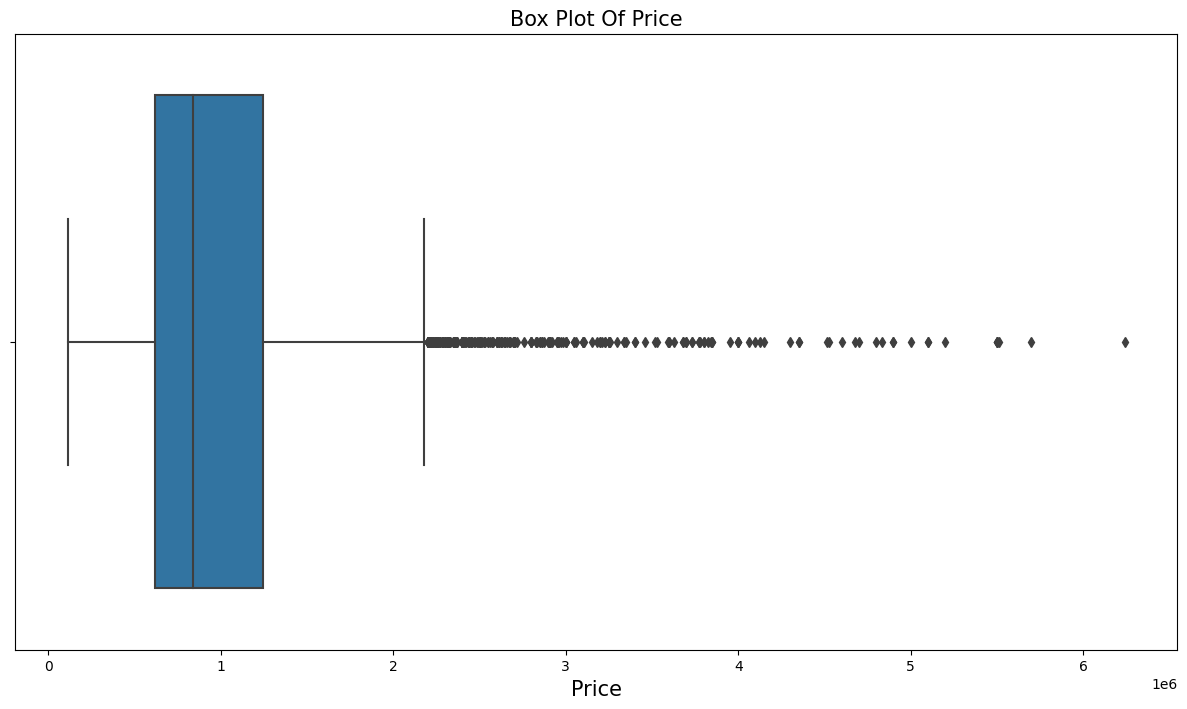

In [24]:
# type your code here
plt.figure(figsize=(15,8))
sns.boxplot(x=df_house['Price'])
plt.title('Box Plot Of Price',fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.show()

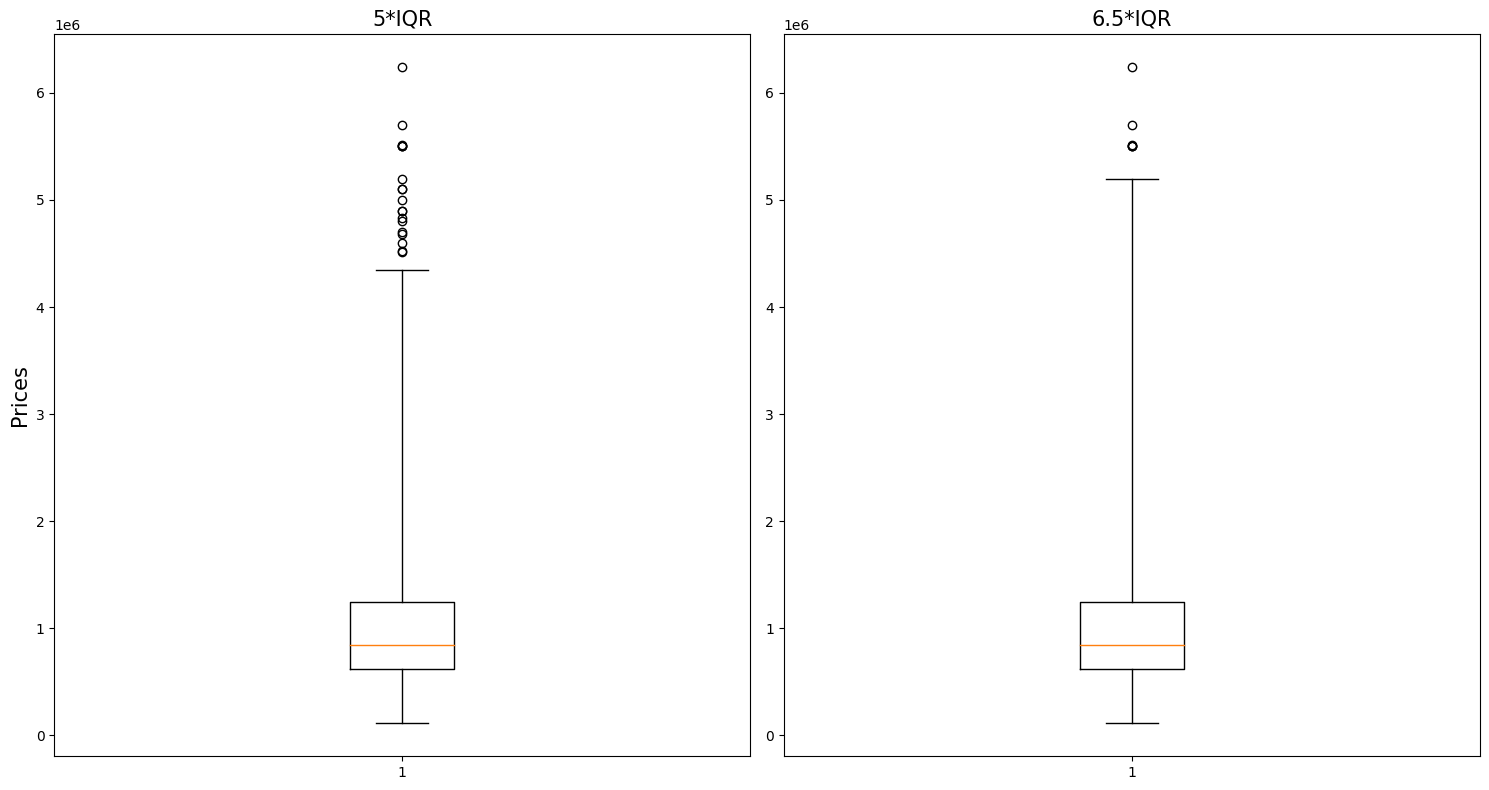

In [25]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.boxplot(x=df_house['Price'],whis=5.0)
plt.title('5*IQR',fontsize=15)
plt.ylabel('Prices',fontsize=15)
plt.subplot(1,2,2)
plt.boxplot(x=df_house['Price'],whis=6.5)
plt.title('6.5*IQR',fontsize=15)
plt.tight_layout()

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
df_house['Distance'].describe()

count    4766.000000
mean       19.328347
std         4.230650
min         5.000000
25%        16.500000
50%        19.300000
75%        22.200000
max        33.100000
Name: Distance, dtype: float64

In [32]:
dist=df_house['Distance']

def new_feat(dist):
    if (dist>=5.0) & (dist<15.0):
        return 'Walking Distance'
    if (dist>15.0) & (dist<25.0):
        return 'Close By'
    if (dist>25.0):
        return 'Far Away'
df_house['Distance_Level']=df_house['Distance'].apply(new_feat)

df_house['Distance_Level']

0               Far Away
1               Close By
2               Close By
3               Close By
4               Close By
              ...       
4761            Close By
4762            Close By
4763            Close By
4764            Close By
4765    Walking Distance
Name: Distance_Level, Length: 4766, dtype: object

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

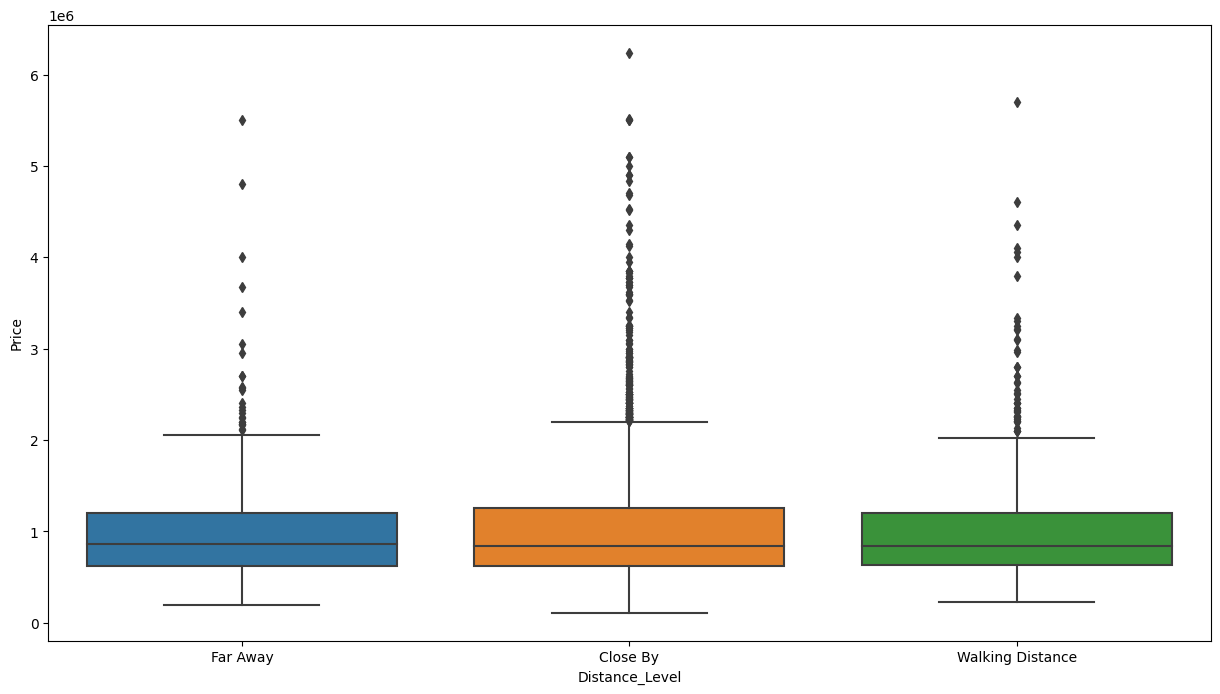

In [33]:
# type your code here
plt.figure(figsize=(15,8))
sns.boxplot(x=df_house['Distance_Level'],y=df_house['Price'])
plt.show()

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# type your code here
from sklearn.model_selection import train_test_split
price_train,price_test=train_test_split(df_house['Price'],test_size=0.20,random_state=0)
